In [198]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [199]:
data = pd.read_csv('/users/youcefdjeddar/downloads/meteorite-landings.csv')
top_10 = data['recclass'].value_counts().index.tolist()[:10]
df = data[data['recclass'].isin(top_10)]
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"(44.216670, 0.616670)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.600000, -65.233330)"


In [200]:
df_with_dummies = pd.get_dummies(df, columns = ['recclass', 'fall'])

In [201]:
with pd.option_context('mode.use_inf_as_null', True):
   df_with_dummies = df_with_dummies.dropna()
df_with_dummies.columns

Index(['name', 'id', 'nametype', 'mass', 'year', 'reclat', 'reclong',
       'GeoLocation', 'recclass_CM2', 'recclass_H4', 'recclass_H4/5',
       'recclass_H5', 'recclass_H6', 'recclass_L4', 'recclass_L5',
       'recclass_L6', 'recclass_LL5', 'recclass_LL6', 'fall_Fell',
       'fall_Found'],
      dtype='object')

In [202]:
X = df_with_dummies[['mass', 'year', 'fall_Fell', 'fall_Found', 'reclat', 'reclong']]
y = df_with_dummies[['recclass_CM2', 'recclass_H4', 'recclass_H4/5',
       'recclass_H5', 'recclass_H6', 'recclass_L4', 'recclass_L5',
       'recclass_L6', 'recclass_LL5', 'recclass_LL6']]

In [203]:
X_normalized = MinMaxScaler().fit(X).transform(X)
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [167]:
df_with_dummies.axes

[Int64Index([    0,     1,     4,     7,     8,    11,    13,    14,    18,
                23,
             ...
             45682, 45688, 45689, 45699, 45702, 45704, 45706, 45710, 45713,
             45714],
            dtype='int64', length=30327),
 Index(['name', 'id', 'nametype', 'mass', 'year', 'reclat', 'reclong',
        'GeoLocation', 'recclass_CM2', 'recclass_H4', 'recclass_H4/5',
        'recclass_H5', 'recclass_H6', 'recclass_L4', 'recclass_L5',
        'recclass_L6', 'recclass_LL5', 'recclass_LL6', 'fall_Fell',
        'fall_Found'],
       dtype='object')]

In [204]:
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [205]:
knn = KNeighborsClassifier(n_neighbors = 100)

In [208]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [209]:
print("Training set score: {:.2f}".format(knn.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test_scaled, y_test)))

Training set score: 0.18
Test set score: 0.04


In [223]:
pca = PCA(n_components=6, whiten=True, random_state=0).fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (22745, 6)


In [224]:
print("Training set score: {:.2f}".format(knn.score(X_train_pca, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test_pca, y_test)))

Training set score: 0.01
Test set score: 0.00


In [59]:
dt = DecisionTreeClassifier().fit(X_train_scaled, y_train)

In [61]:
print("Training set score: {:.2f}".format(dt.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(dt.score(X_test_scaled, y_test)))

Training set score: 0.71
Test set score: 0.16


In [63]:
rf = RandomForestClassifier().fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(rf.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(rf.score(X_test_scaled, y_test)))

Training set score: 0.65
Test set score: 0.02


In [128]:
X1 = df_with_dummies[['recclass_CM2', 'recclass_H4', 'recclass_H4/5',
       'recclass_H5', 'recclass_H6', 'recclass_L4', 'recclass_L5',
       'recclass_L6', 'recclass_LL5', 'recclass_LL6']]
y1 = df_with_dummies[['mass']]

In [128]:
# each feature should be centered (zero mean) and with unit variance
X1_normalized = StandardScaler().fit(X1).transform(X1)
pca = PCA(n_components = 2).fit(X1_normalized)
X_pca = pca.transform(X1_normalized)

Text(0,0.5,'Second principal component')

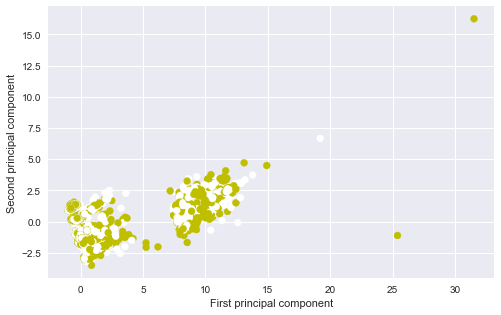

In [184]:
sns.set()
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:,0], X_pca[:,1], marker = 'o', c='y1')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [135]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1 ,random_state = 0)
linreg = LinearRegression().fit(X1_train, y1_train)

In [136]:
linreg = LinearRegression().fit(X1_train, y1_train)

In [137]:
linreg.score(X1_test, y1_test)

-0.004235899225622397

In [138]:
linreg.score(X1_train, y1_train)

0.0006353418622160323

In [139]:
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X1)
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y1, random_state = 0)
linreg = LinearRegression().fit(X1_train, y1_train)

In [153]:
linreg.score(X1_test, y1_test)

-0.004235899225622397

In [154]:
linreg.score(X1_train, y1_train)

0.0006353418622160323

In [155]:
ridge = Ridge(alpha = 200, random_state = 0).fit(X1_train, y1_train)
print("Training set score: {:.2f}".format(ridge.score(X1_train, y1_train)))
print("Test set score: {:.2f}".format(ridge.score(X1_test, y1_test)))

Training set score: 0.00
Test set score: -0.00


In [156]:
scaler = MinMaxScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.fit_transform(X1_test)
lasso = Lasso(alpha = 200, random_state = 0).fit(X1_train_scaled, y1_train)
print("Training set score: {:.2f}".format(lasso.score(X1_train_scaled, y1_train)))
print("Test set score: {:.2f}".format(lasso.score(X1_test_scaled, y1_test)))

Training set score: 0.00
Test set score: -0.00


In [ ]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(df_with_dummies.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")